### MACHINE LEARNING - PROJECT

#### Team members

#### N. Sriya Setty- 20BCI7020
#### G.Vyshnavi- 20BCI7004
#### Sehej Soni- 20BCI7100

In [64]:
import numpy as np                    #Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
customers=pd.read_csv("customers.csv") #Importing dataset

### Data Cleaning

In [66]:
customers.info()    #data preprocessing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [67]:
customers

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [68]:
categories={"Female":1,"Male":0}                               #mapping categorical values
customers['Genre']=customers['Genre'].map(categories)

In [69]:
customers

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [70]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Genre                   200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [71]:
customers.isnull().sum()  # No.of null values

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Logistic Regression

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [159]:
customers

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [160]:
X=customers.drop(["Genre"],axis=1)  # Dropping the target variable
X

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40
...,...,...,...,...
195,196,35,120,79
196,197,45,126,28
197,198,32,126,74
198,199,32,137,18


In [161]:
y=customers[["Genre"]] # target variable Genre
y

,Genre
0,0
1,0
2,1
3,1
4,1
...,...
195,1
196,1
197,0
198,0


In [162]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)  #Splitting the dataset

In [163]:
m=LogisticRegression()  #Training the model
m.fit(X_train,y_train)

C:\Users\sriya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [164]:
y_act=m.predict(X_train) #Predicting the value
y_pre=m.predict(X_test)

In [165]:
print("Training Accuracy : ",accuracy_score(y_act,y_train))
print("Testing Accuracy : ",accuracy_score(y_pre,y_test))

Training Accuracy :  0.56875
Testing Accuracy :  0.65


In [166]:
print("Confusion matrix\n",confusion_matrix(y_test,y_pre))

Confusion matrix
 [[ 5  8]
 [ 6 21]]


In [168]:
from sklearn.metrics import recall_score       #recall Score
print(recall_score(y_test,y_pre,labels=None,pos_label=1,average='binary',sample_weight=None,zero_division='warn'))

0.7777777777777778


In [171]:
from sklearn.metrics import precision_score    #precision score
precision_score(y_test, y_pre, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')

0.7241379310344828

In [172]:
X=customers.drop(["Annual Income (k$)"],axis=1)  # Dropping the target variable
X

,CustomerID,Genre,Age,Spending Score (1-100)
0,1,0,19,39
1,2,0,21,81
2,3,1,20,6
3,4,1,23,77
4,5,1,31,40
...,...,...,...,...
195,196,1,35,79
196,197,1,45,28
197,198,0,32,74
198,199,0,32,18


In [173]:
y=customers[["Annual Income (k$)"]] # target variable Annual Income
y

,Annual Income (k$)
0,15
1,15
2,16
3,16
4,17
...,...
195,120
196,126
197,126
198,137


In [174]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)  #Splitting the dataset

In [175]:
m=LogisticRegression()  #Training the model
m.fit(X_train,y_train)

C:\Users\sriya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sriya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [176]:
y_act=m.predict(X_train) #Predicting the value
y_pre=m.predict(X_test)

In [177]:
print("Training Accuracy : ",accuracy_score(y_act,y_train))
print("Testing Accuracy : ",accuracy_score(y_pre,y_test))

Training Accuracy :  0.3125
Testing Accuracy :  0.075


In [178]:
print("Confusion matrix\n",confusion_matrix(y_test,y_pre))

Confusion matrix
 [[0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [180]:
from sklearn.metrics import recall_score       #recall Score
print(recall_score(y_test,y_pre,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))

0.075


C:\Users\sriya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [183]:
from sklearn.metrics import precision_score    #precision score
precision_score(y_test, y_pre, labels=None, pos_label=1, average='weighted', sample_weight=None, zero_division='warn')

C:\Users\sriya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.035833333333333335

In [184]:
X=customers.drop(["Spending Score (1-100)"],axis=1)  # Dropping the target variable
X

,CustomerID,Genre,Age,Annual Income (k$)
0,1,0,19,15
1,2,0,21,15
2,3,1,20,16
3,4,1,23,16
4,5,1,31,17
...,...,...,...,...
195,196,1,35,120
196,197,1,45,126
197,198,0,32,126
198,199,0,32,137


In [185]:
y=customers[["Annual Income (k$)"]] # target variable Annual Income
y

,Annual Income (k$)
0,15
1,15
2,16
3,16
4,17
...,...
195,120
196,126
197,126
198,137


In [186]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)  #Splitting the dataset

In [187]:
m=LogisticRegression()  #Training the model
m.fit(X_train,y_train)

C:\Users\sriya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\sriya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [188]:
y_act=m.predict(X_train) #Predicting the value
y_pre=m.predict(X_test)

In [189]:
print("Training Accuracy : ",accuracy_score(y_act,y_train))
print("Testing Accuracy : ",accuracy_score(y_pre,y_test))

Training Accuracy :  0.33125
Testing Accuracy :  0.075


In [190]:
print("Confusion matrix\n",confusion_matrix(y_test,y_pre))

Confusion matrix
 [[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [193]:
from sklearn.metrics import recall_score       #recall Score
print(recall_score(y_test,y_pre,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))

0.075


C:\Users\sriya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [192]:
from sklearn.metrics import precision_score    #precision score
precision_score(y_test, y_pre, labels=None, pos_label=1, average='weighted', sample_weight=None, zero_division='warn')

C:\Users\sriya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.03645833333333333

### SVM

In [290]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split                            # Importing Libraries


In [291]:
X=customers.drop(["Genre"],axis=1)  #dropping the target variable



In [292]:
y=customers[["Genre"]]  # Target variable Genre

In [293]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=101)   #Splitting the dataset

In [294]:
from sklearn import svm  # Importing svm
model=svm.SVC()

In [295]:
model.fit(X_train,y_train)  #Training the model

C:\Users\sriya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [300]:
y_tr_pred=model.predict(X_train) #predicting the values
y_te_pred=model.predict(X_test)

In [301]:
print("Training Accuracy : ",accuracy_score(y_train,y_tr_pred))
print("Testing Accuracy : ",accuracy_score(y_test,y_te_pred))

Training Accuracy :  0.59375
Testing Accuracy :  0.55


In [302]:
print("Confusion Matrix\n",confusion_matrix(y_test,y_te_pred))

Confusion Matrix
 [[ 3 14]
 [ 4 19]]


In [303]:
from sklearn.metrics import recall_score       #recall Score
print(recall_score(y_test,y_te_pred,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division=1))

0.55


In [304]:
from sklearn.metrics import precision_score    #precision score
precision_score(y_test, y_te_pred, labels=None, pos_label=1, average='weighted', sample_weight=None, zero_division='warn')

0.5132034632034632

In [305]:
X=customers.drop(["Annual Income (k$)"],axis=1)  #dropping the target variable


In [306]:
y=customers[["Annual Income (k$)"]]  # Target variable Annual Income

In [307]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=101)   #Splitting the dataset

In [308]:
from sklearn import svm  # Importing svm
model=svm.SVC()

In [309]:
model.fit(X_train,y_train)  #Training the model

C:\Users\sriya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [310]:
y_tr_pred=model.predict(X_train) #predicting the values
y_te_pred=model.predict(X_test)

In [311]:
print("Training Accuracy : ",accuracy_score(y_train,y_tr_pred))
print("Testing Accuracy : ",accuracy_score(y_test,y_te_pred))

Training Accuracy :  0.14375
Testing Accuracy :  0.125


In [312]:
print("Confusion Matrix\n",confusion_matrix(y_test,y_te_pred))

Confusion Matrix
 [[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [313]:
from sklearn.metrics import recall_score       #recall Score
print(recall_score(y_test,y_te_pred,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))

0.125


C:\Users\sriya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [314]:
from sklearn.metrics import precision_score    #precision score
precision_score(y_test,y_te_pred, labels=None, pos_label=1, average='weighted', sample_weight=None, zero_division='warn')

C:\Users\sriya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.027500000000000004

In [315]:
X=customers.drop(["Spending Score (1-100)"],axis=1)  #dropping the target variable

In [316]:
y=customers[["Spending Score (1-100)"]]  # Target variable Spending Score

In [317]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=101)   #Splitting the dataset

In [318]:
from sklearn import svm  # Importing svm
model=svm.SVC()

In [319]:
model.fit(X_train,y_train)  #Training the model

C:\Users\sriya\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC()

In [320]:
y_tr_pred=model.predict(X_train) #predicting the values
y_te_pred=model.predict(X_test)

In [321]:
print("Training Accuracy : ",accuracy_score(y_train,y_tr_pred))
print("Testing Accuracy : ",accuracy_score(y_test,y_te_pred))

Training Accuracy :  0.09375
Testing Accuracy :  0.025


In [322]:
print("Confusion Matrix\n",confusion_matrix(y_test,y_te_pred))

Confusion Matrix
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [323]:
from sklearn.metrics import recall_score       #recall Score
print(recall_score(y_test,y_te_pred,labels=None,pos_label=1,average='micro',sample_weight=None,zero_division='warn'))

0.025


In [324]:
from sklearn.metrics import precision_score    #precision score
precision_score(y_test,y_te_pred, labels=None, pos_label=1, average='weighted', sample_weight=None, zero_division='warn')

C:\Users\sriya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0011904761904761904

### Random Forest

In [238]:
import pandas as pd                                                # Importing Libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report 

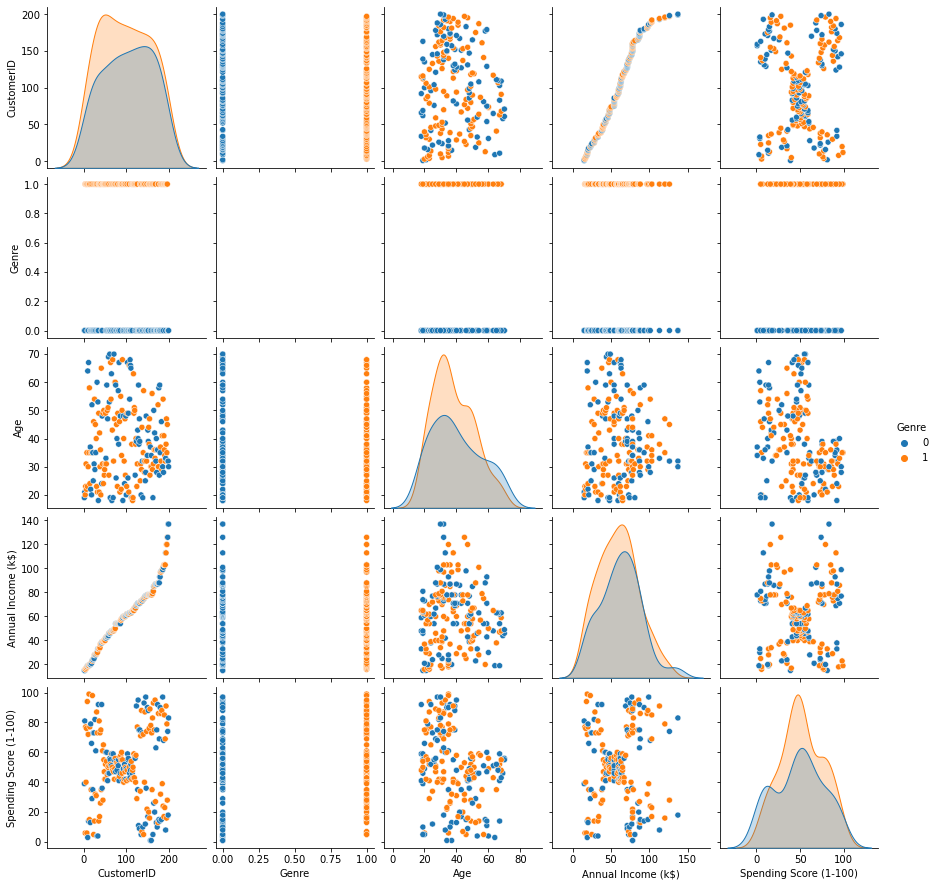

In [239]:
sns.pairplot(customers,hue="Genre",vars=['CustomerID','Genre','Age','Annual Income (k$)','Spending Score (1-100)'])  #printing pairplot

In [263]:
X=customers.drop(["Genre"],axis=1)  #dropping the target variable

In [264]:
y=customers[["Genre"]] #target variable Genre

In [265]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=101)   #Splitting the dataset

In [266]:
from sklearn.ensemble import RandomForestClassifier  #importing RandomForestClassifier
m= RandomForestClassifier(n_estimators=250)
m=m.fit(X_train,y_train)                #Training the model

C:\Users\sriya\AppData\Local\Temp/ipykernel_30144/3950260488.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m=m.fit(X_train,y_train)                #Training the model


In [267]:
y_predict=m.predict(X_test) #predicting the values
y_predict

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [268]:
print("Classification Report\n",classification_report(y_test,y_predict))

Classification Report
               precision    recall  f1-score   support

           0       0.47      0.41      0.44        17
           1       0.60      0.65      0.63        23

    accuracy                           0.55        40
   macro avg       0.53      0.53      0.53        40
weighted avg       0.54      0.55      0.55        40



In [269]:
m.score(X_test,y_test) #accuracy

0.55

In [270]:
from sklearn.metrics import recall_score       #recall Score
print(recall_score(y_test,y_predict,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))

0.55


In [271]:
from sklearn.metrics import precision_score    #precision score
precision_score(y_test, y_predict, labels=None, pos_label=1, average='weighted', sample_weight=None, zero_division='warn')

0.5433333333333333

In [272]:
X=customers.drop(["Annual Income (k$)"],axis=1)  #dropping the target variable

In [273]:
y=customers[["Annual Income (k$)"]] #target variable Genre

In [274]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=101)   #Splitting the dataset

In [275]:
from sklearn.ensemble import RandomForestClassifier  #importing RandomForestClassifier
m= RandomForestClassifier(n_estimators=250)
m=m.fit(X_train,y_train)                #Training the model

C:\Users\sriya\AppData\Local\Temp/ipykernel_30144/3950260488.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m=m.fit(X_train,y_train)                #Training the model


In [276]:
y_predict=m.predict(X_test) #predicting the values
y_predict

array([ 39,  63,  33,  60,  48,  67,  44,  50,  73,  67,  77,  67, 101,
        44,  76,  78,  25,  34,  86,  33,  87,  78,  97,  48,  48,  40,
        39,  71,  87,  18,  28,  74,  57,  28,  39,  30,  73, 120,  78,
        99], dtype=int64)

In [277]:
print("Classification Report\n",classification_report(y_test,y_predict))

Classification Report
               precision    recall  f1-score   support

          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          30       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         2
          34       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         1
          39       0.33      1.00      0.50         1
          40       0.00      0.00      0.00         0
          42       0.00      0.00      0.00         1
          43       0.00      0.00      0.00         2
          44       0.00      0.00      0.00         0
          46       0.00      0.00      0.00         1
          48       0.67      1.00      0.80         2
    

C:\Users\sriya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sriya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sriya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sriya\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [278]:
m.score(X_test,y_test) #accuracy

0.25

In [279]:
from sklearn.metrics import recall_score       #recall Score
print(recall_score(y_test,y_predict,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))

0.25


C:\Users\sriya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [280]:
from sklearn.metrics import precision_score    #precision score
precision_score(y_test, y_predict, labels=None, pos_label=1, average='weighted', sample_weight=None, zero_division='warn')

C:\Users\sriya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.225

In [281]:
X=customers.drop(["Spending Score (1-100)"],axis=1)  #dropping the target variable

In [282]:
y=customers[["Spending Score (1-100)"]] #target variable Spending Score

In [283]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=101)   #Splitting the dataset

In [284]:
from sklearn.ensemble import RandomForestClassifier  #importing RandomForestClassifier
m= RandomForestClassifier(n_estimators=250)
m=m.fit(X_train,y_train)                #Training the model

C:\Users\sriya\AppData\Local\Temp/ipykernel_30144/3950260488.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m=m.fit(X_train,y_train)                #Training the model


In [285]:
y_predict=m.predict(X_test) #predicting the values
y_predict

array([61, 52, 87, 60, 47, 59, 50, 51, 12, 87, 74, 40, 15, 60, 73, 88, 73,
       17, 92, 81, 92, 88, 69, 59, 59, 42, 28, 95, 92, 81, 14, 34, 48, 32,
       61,  4, 29, 16,  1, 86], dtype=int64)

In [286]:
print("Classification Report\n",classification_report(y_test,y_predict))

Classification Report
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         0
          32       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         0
          36       0.00      0.00      0.00         1
    

C:\Users\sriya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sriya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sriya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sriya\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [287]:
m.score(X_test,y_test) #accuracy

0.075

In [288]:
from sklearn.metrics import precision_score    #precision score
precision_score(y_test, y_predict, labels=None, pos_label=1, average='weighted', sample_weight=None, zero_division='warn')

C:\Users\sriya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.058333333333333334

In [289]:
from sklearn.metrics import recall_score       #recall Score
print(recall_score(y_test,y_predict,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))

0.075


C:\Users\sriya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Neural Network

In [96]:
X=customers.drop(['Genre'],axis=1) #dropping the target variable


In [97]:
y=customers[['Genre']] #target variable Genre


In [98]:
from sklearn.model_selection import train_test_split              #Splitting the dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [99]:
from sklearn.preprocessing import StandardScaler   #Using StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [100]:
import tensorflow as tf   #importing tensorflow

In [116]:
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [117]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [118]:
history=ann.fit(X_train,Y_train,batch_size=32,epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: -10.2871 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: -12.0404 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 0s/step - loss: -13.7725 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: -15.5406 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: -17.2681 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: -18.9908 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: -20.8366 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: -22.5133 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: -24.3134 - accuracy: 0.0000e+00
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: -2

In [119]:
from sklearn.metrics import accuracy_score   #Finding Accuracy
pred_y_test=ann.predict(X_test)
pred_y_test=pred_y_test.round()
Accuracy=accuracy_score(y_test,pred_y_test)
print("Accuracy is: ",Accuracy)

Accuracy is:  0.675


In [120]:
from sklearn.metrics import classification_report,confusion_matrix #Confusion matrix
print("Confusion matrix\n",confusion_matrix(y_test,pred_y_test))

Confusion matrix
 [[ 0 13]
 [ 0 27]]


In [121]:
from sklearn.metrics import precision_score    #precision score
precision_score(y_test, pred_y_test, labels=None, pos_label=1, average='weighted', sample_weight=None, zero_division='warn')

C:\Users\sriya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.45562500000000006

In [122]:
from sklearn.metrics import recall_score       #recall Score
print(recall_score(y_test,pred_y_test,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))

0.675


In [133]:
X=customers.drop(['Annual Income (k$)'],axis=1) #dropping the target variable

In [134]:
y=customers[['Annual Income (k$)']] #target variable Annual Income

In [135]:
from sklearn.model_selection import train_test_split   #Splitting the dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [136]:
from sklearn.preprocessing import StandardScaler   #Using StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [137]:
import tensorflow as tf   #importing tensorflow

In [138]:
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [139]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [140]:
history=ann.fit(X_train,Y_train,batch_size=32,epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 27.8685 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 24.5812 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 2ms/step - loss: 21.4587 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 18.3475 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 15.2346 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 12.1405 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 8.9860 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 0s/step - loss: 5.8820 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 2.6444 - accuracy: 0.0000e+00
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: -0.5508 - accu

In [141]:
from sklearn.metrics import accuracy_score   #Finding Accuracy
pred_y_test=ann.predict(X_test)
pred_y_test=pred_y_test.round()
Accuracy=accuracy_score(y_test,pred_y_test)
print("Accuracy is: ",Accuracy)

Accuracy is:  0.675


In [142]:
from sklearn.metrics import classification_report,confusion_matrix #Confusion matrix
print("Confusion matrix\n",confusion_matrix(y_test,pred_y_test))

Confusion matrix
 [[ 0 13]
 [ 0 27]]


In [145]:
from sklearn.metrics import precision_score    #precision score
precision_score(y_test, pred_y_test, labels=None, pos_label=1, average='weighted', sample_weight=None, zero_division='warn')

C:\Users\sriya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.45562500000000006

In [146]:
from sklearn.metrics import recall_score       #recall Score
print(recall_score(y_test,pred_y_test,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))

0.675


In [147]:
X=customers.drop(["Spending Score (1-100)"],axis=1)  # Dropping the target variable

In [149]:
y=customers[['Spending Score (1-100)']] #target variable Annual Income

In [150]:
from sklearn.model_selection import train_test_split   #Splitting the dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [151]:
from sklearn.preprocessing import StandardScaler   #Using StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [152]:
import tensorflow as tf   #importing tensorflow

In [153]:
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

In [154]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [155]:
history=ann.fit(X_train,Y_train,batch_size=32,epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 19.6840 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 0s/step - loss: 17.6975 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 0s/step - loss: 15.6592 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 13.8218 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 11.9140 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 2ms/step - loss: 9.9827 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 8.1402 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 0s/step - loss: 6.2879 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 2ms/step - loss: 4.3237 - accuracy: 0.0000e+00
Epoch 10/100
5/5 [==============================] - 0s 2ms/step - loss: 2.5173 - accuracy

In [156]:
from sklearn.metrics import accuracy_score   #Finding Accuracy
pred_y_test=ann.predict(X_test)
pred_y_test=pred_y_test.round()
Accuracy=accuracy_score(y_test,pred_y_test)
print("Accuracy is: ",Accuracy)

Accuracy is:  0.675


In [157]:
from sklearn.metrics import classification_report,confusion_matrix #Confusion matrix
print("Confusion matrix\n",confusion_matrix(y_test,pred_y_test))

Confusion matrix
 [[ 0 13]
 [ 0 27]]


In [158]:
from sklearn.metrics import precision_score    #precision score
precision_score(y_test, pred_y_test, labels=None, pos_label=1, average='weighted', sample_weight=None, zero_division='warn')

C:\Users\sriya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.45562500000000006

In [159]:
from sklearn.metrics import recall_score       #recall Score
print(recall_score(y_test,pred_y_test,labels=None,pos_label=1,average='weighted',sample_weight=None,zero_division='warn'))

0.675
